# PRÁCTICA MACHINE LEARNING

#### *Jonay Temiño García*


En esta práctica se va a analizar una gran base de datos de **Airbnb** con la intención de crear un modelo de **Machine Learning** capaz de predecir el precio de alquiler de las viviendas. El objetivo es conseguir un modelo orientativo, que a pesar de no ser altamente preciso, pueda ayudar a estimar el valor de alquiler en función de las características de la vivienda.

Para tratar los datos vamos a utilizar **Dataframes** de **Pandas**, así como serán necesarias las librerías de **Numpy** y **Matplotlib**.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los datos a analizar:

In [6]:
df_airbnb_inicial = pd.read_csv("airbnb-listings-extract.csv",  delimiter=";")

## 1. Preparación de datos: división train / test

Como en todo proyecto, lo primero que se debe hacer es la separación de datos en train y test. Esto se debe realizar incluso antes de limpiar los datos para evitar ningún sesgo por nuestra parte.

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split( df_airbnb_inicial, test_size = 0.2 , shuffle=True, random_state=0 )

print(df_train.shape)
print(df_test.shape)

df_train.to_csv('df_airbnb_train.csv')
df_test.to_csv('df_airbnb_test.csv')


(11824, 89)
(2956, 89)


## 2. Análisis exploratorio
Llevamos a cabo un análisis de los datos que nos permitan una mejor comprensión de los mismos. Buscamos características que puedan ser relevantes o no, outliers que sean necesarios eliminar, correlaciones a tener en cuenta en el modelo, etc.

### 2.1. Análisis general

* En primer lugar, se analizan las columnas y sus tipos:

In [12]:
df_airbnb_inicial.head(3).T

,0,1,2
ID,11210388,17471131,17584891
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891
Scrape ID,20170306202425,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals"
...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30
Calculated host listings count,1.0,106.0,106.0
Reviews per Month,3.5,0.86,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868"


In [13]:
df_airbnb_inicial = pd.read_csv('df_airbnb_train.csv')
print(f'Los datos tienen {df_airbnb_inicial.shape[0]} filas y {df_airbnb_inicial.shape[1]} columnas.')
print("Los nombres de las columnas y sus tipos son:")
pd.set_option('display.max_rows', 100)
print(df_airbnb_inicial.dtypes)

Los datos tienen 11824 filas y 90 columnas.
Los nombres de las columnas y sus tipos son:
Unnamed: 0                          int64
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                     

* En segundo lugar, se despliega un resumen de la información más relevante como la cuenta, media, desviación, cuartiles, etc.

In [15]:
df_airbnb_inicial.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11824.0,7.369724e+03,4.269871e+03,0.000000e+00,3.641500e+03,7.373500e+03,1.106425e+04,1.477700e+04
ID,11824.0,1.025308e+07,5.566485e+06,1.986400e+04,5.510692e+06,1.125754e+07,1.531982e+07,1.858361e+07
Scrape ID,11824.0,2.017038e+13,5.505346e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11824.0,3.588310e+07,3.411993e+07,1.745300e+04,6.855490e+06,2.454770e+07,5.431096e+07,1.247534e+08
Host Response Rate,10317.0,9.480372e+01,1.524708e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11821.0,1.275442e+01,3.457890e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,11821.0,1.275442e+01,3.457890e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,11824.0,4.049163e+01,4.701030e+00,-3.785118e+01,4.040976e+01,4.041933e+01,4.043078e+01,5.596691e+01
Longitude,11824.0,-3.776863e+00,1.401469e+01,-1.231244e+02,-3.707538e+00,-3.700763e+00,-3.683917e+00,1.533714e+02
Accommodates,11824.0,3.277486e+00,2.093973e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01


### 2.2. Análisis específico

* Posteriormente, se analizan algunas columnas en concreto como 'Country', 'State' y 'City' para conocer los lugares en los que vamos a aplicar nuestro modelo.

In [18]:
df_airbnb_inicial['Country'].value_counts()

Country
Spain             11203
United States       139
United Kingdom      127
France               87
Italy                61
Australia            38
Ireland              34
Germany              33
Austria              26
Netherlands          19
Belgium              16
Canada               16
Denmark              14
Switzerland           4
Greece                3
Hong Kong             2
Cuba                  1
Name: count, dtype: int64

In [19]:
df_airbnb_inicial['State'].value_counts().head(10)

State
Comunidad de Madrid    8507
Community of Madrid    1497
Madrid                  543
Catalunya               154
Balearic Islands        137
Illes Balears           136
Île-de-France            85
NY                       53
CA                       51
Lazio                    49
Name: count, dtype: int64

In [20]:
df_airbnb_inicial['City'].value_counts().head(10)

City
Madrid       10567
Barcelona      235
London         104
Paris           85
Palma           44
马德里             43
Roma            33
Berlin          32
Alcúdia         31
Dublin          29
Name: count, dtype: int64

In [21]:
df_airbnb_inicial['Neighbourhood Group Cleansed'].value_counts().head(10)

Neighbourhood Group Cleansed
Centro               5433
Chamberí              766
Salamanca             719
Arganzuela            639
Tetuán                370
Moncloa - Aravaca     359
Retiro                356
Latina                296
Carabanchel           289
Chamartín             283
Name: count, dtype: int64

* También hacemos un análisis rápido de columnas que pueden ser relevantes.

In [23]:
df_airbnb_inicial['Property Type'].value_counts()

Property Type
Apartment             9598
House                 1085
Condominium            284
Bed & Breakfast        274
Loft                   248
Other                  171
Dorm                    37
Guesthouse              32
Chalet                  22
Townhouse               15
Villa                   15
Hostel                  13
Serviced apartment       9
Boutique hotel           5
Camper/RV                3
Casa particular          3
Boat                     3
Guest suite              2
Earth House              2
Bungalow                 2
Tent                     1
Name: count, dtype: int64

In [24]:
df_airbnb_inicial['Room Type'].unique()

array(['Entire home/apt', 'Shared room', 'Private room'], dtype=object)

In [25]:
df_airbnb_inicial['Bed Type'].value_counts()

Bed Type
Real Bed         11565
Pull-out Sofa      201
Futon               36
Couch               17
Airbed               5
Name: count, dtype: int64

### 2.3. Exploración mediante visualización

* Seguimos con la exploración de variables llamativas, pero con gráficas.

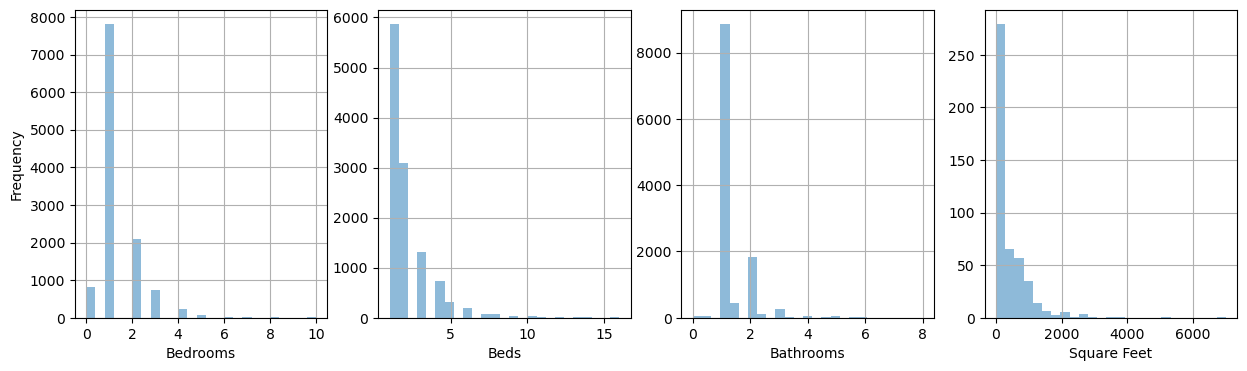

In [28]:
plt.figure(figsize=(15, 4))

plt.subplot(1,4,1)
df_airbnb_inicial['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

plt.subplot(1,4,2)
df_airbnb_inicial['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')
plt.ylabel('')

plt.subplot(1,4,3)
df_airbnb_inicial['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')
plt.ylabel('')

plt.subplot(1,4,4)
df_airbnb_inicial['Square Feet'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Square Feet')
plt.ylabel('')

plt.show()

En todas las gráficas anteriores, se puede observar cómo la distribución de datos se centra en la zona izquierda de la gráfica, lo cual indica la presencia de outliers para los valores más altos, lo cual se tratará más adelante.

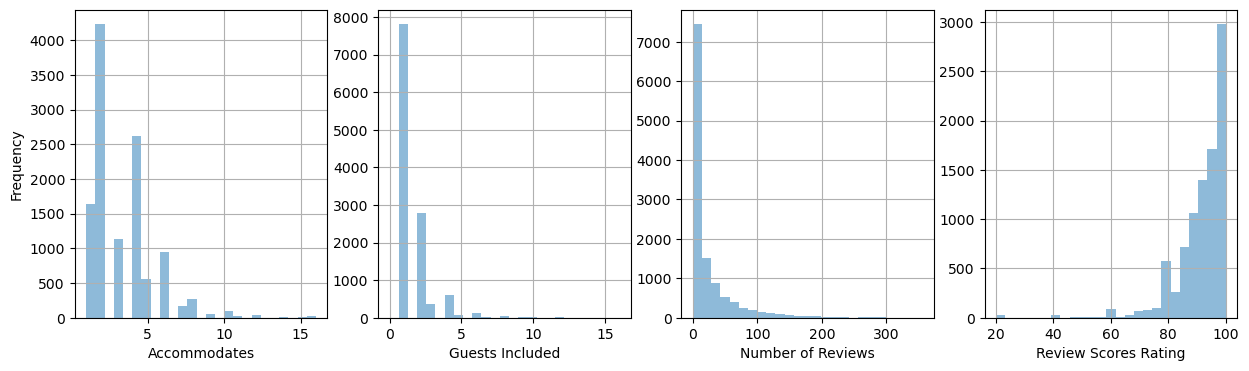

In [30]:
plt.figure(figsize=(15, 4))

plt.subplot(1,4,1)
df_airbnb_inicial['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')
plt.ylabel('Frequency')

plt.subplot(1,4,2)
df_airbnb_inicial['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Guests Included')
plt.ylabel('')

plt.subplot(1,4,3)
df_airbnb_inicial['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Number of Reviews')
plt.ylabel('')

plt.subplot(1,4,4)
df_airbnb_inicial['Review Scores Rating'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Rating')
plt.ylabel('')

plt.show()

Al igual que en el anterior caso, se puede observar la presencia de valores atípicos.

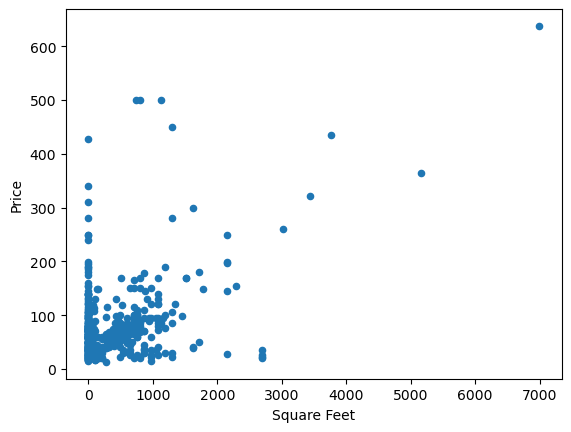

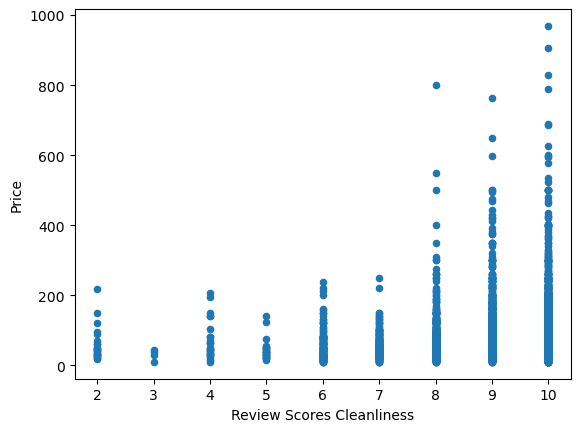

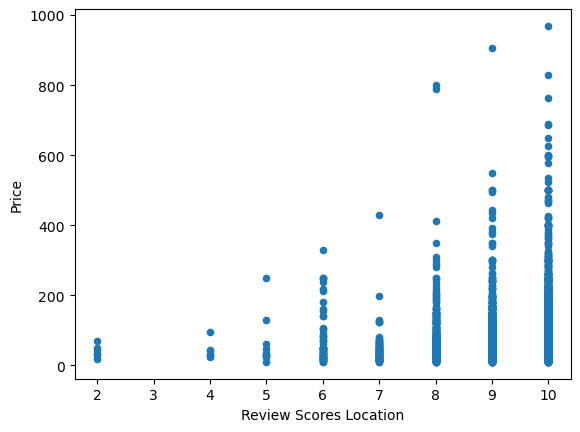

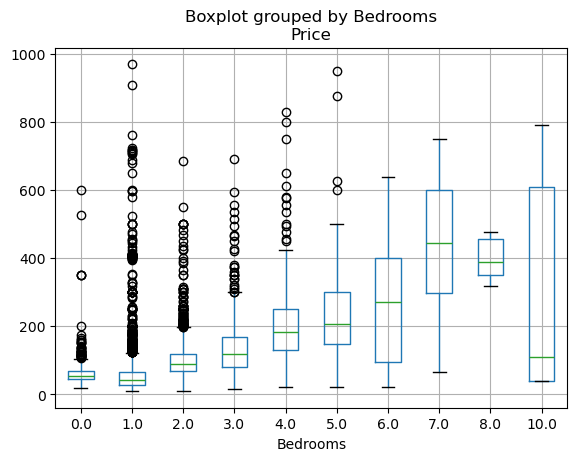

In [32]:
df_airbnb_inicial.plot(kind = 'scatter',x='Square Feet',y = 'Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

df_airbnb_inicial.plot(kind = 'scatter',x='Review Scores Cleanliness',y = 'Price')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.show()

df_airbnb_inicial.plot(kind = 'scatter',x='Review Scores Location',y = 'Price')
plt.xlabel('Review Scores Location')
plt.ylabel('Price')
plt.show()

df_airbnb_inicial.boxplot(by='Bedrooms',column = 'Price')
plt.show()

En cuanto a las últimas tres visualizaciones:
* En la primera gráfica, resulta llamativo que exista un margen tan grande de precios alrededor del valor cero. No obstante, si obviamos estos valores, se puede observar cierta colinealidad entre la superficie de la vivienda y el precio del alquiler, lo cual era de esperar.
* En segundo y tercer lugar, se observa claramente una relación directa entre las 'Reviews' de limpieza y localización y el precio de alquiler, lo cual tampoco sorprende.
* Y por último, el gráfico de cajas muestra también una relación entre el número de habitaciones y el precio, aunque con gran cantidad de outliers.

## 3. Preprocesamiento
A continuación, se procede al preprocesamiento de los datos: limpieza de los mismos, eliminación de variables, generación de nuevas variables, análisis de correlación entre ellas, etc.

* En primer lugar, hacemos una selección rápida de variables, omitiendo aquellas que son irrelevantes para nuestro modelo.

Todas las variables directamente relacionadas con el precio de alquiler, como 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Extra People' y otras serán eliminadas, ya que considero que el objetivo del modelo es predecir el precio de alquiler de una nueva vivienda, por lo que todos estos datos serían desconocidos para la predicción.
De la misma forma, otras variables también serán eliminadas por su irrelevancia predictiva como 'Name','ID', 'Scrape ID', 'Host ID', 'Summary', 'Space', 'Description', 'Host Listings Count' y muchas más.

In [37]:
df_airbnb = df_airbnb_inicial[['Host Response Rate','Host Acceptance Rate','Accommodates','Bathrooms','Bedrooms','Beds','Square Feet','Price','Neighbourhood Group Cleansed','City','State','Country','Property Type','Room Type','Bed Type','Guests Included','Minimum Nights','Number of Reviews','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Reviews per Month','Cancellation Policy']]

### 3.1. Valores Nulos

* En segundo lugar, procedemos a analizar los valores nulos para su posterior eliminación o imputación, según convenga.

In [40]:
df_airbnb.isnull().any()

Host Response Rate               True
Host Acceptance Rate             True
Accommodates                    False
Bathrooms                        True
Bedrooms                         True
Beds                             True
Square Feet                      True
Price                            True
Neighbourhood Group Cleansed     True
City                             True
State                            True
Country                          True
Property Type                   False
Room Type                       False
Bed Type                        False
Guests Included                 False
Minimum Nights                  False
Number of Reviews               False
Review Scores Rating             True
Review Scores Accuracy           True
Review Scores Cleanliness        True
Review Scores Checkin            True
Review Scores Communication      True
Review Scores Location           True
Review Scores Value              True
Reviews per Month                True
Cancellation

In [41]:
total = df_airbnb.shape[0]

for i in df_airbnb.columns:
    nulos = df_airbnb[i].isnull().sum()
    print(f'En la columna {i} hay un {(nulos*100/total).round(2)}% de nulos.')

En la columna Host Response Rate hay un 12.75% de nulos.
En la columna Host Acceptance Rate hay un 99.75% de nulos.
En la columna Accommodates hay un 0.0% de nulos.
En la columna Bathrooms hay un 0.37% de nulos.
En la columna Bedrooms hay un 0.17% de nulos.
En la columna Beds hay un 0.31% de nulos.
En la columna Square Feet hay un 95.99% de nulos.
En la columna Price hay un 0.13% de nulos.
En la columna Neighbourhood Group Cleansed hay un 6.92% de nulos.
En la columna City hay un 0.03% de nulos.
En la columna State hay un 1.01% de nulos.
En la columna Country hay un 0.01% de nulos.
En la columna Property Type hay un 0.0% de nulos.
En la columna Room Type hay un 0.0% de nulos.
En la columna Bed Type hay un 0.0% de nulos.
En la columna Guests Included hay un 0.0% de nulos.
En la columna Minimum Nights hay un 0.0% de nulos.
En la columna Number of Reviews hay un 0.0% de nulos.
En la columna Review Scores Rating hay un 22.51% de nulos.
En la columna Review Scores Accuracy hay un 22.67% de 

Viendo la cantidad de nulos que hay en las variables 'Host Acceptance Rate' y 'Square Feet', estas variables serán eliminadas.
Existen otras columnas con una gran cantidad de nulos como 'Host Response Rate', y todas las 'Review Scores', pero de momento vamos a imputar y continuar con estas variables.

In [43]:
df_airbnb = df_airbnb.drop(['Host Acceptance Rate','Square Feet'], axis=1)

Además, también se decide eliminar aquellas instancias con valores nulos en 'Price', ya que son muy pocos valores y al ser la variable objetivo no considero necesario aplicar la media en este caso.

In [45]:
df_airbnb['Price'].isnull().value_counts()

Price
False    11809
True        15
Name: count, dtype: int64

In [46]:
df_airbnb=df_airbnb.dropna(subset=['Price'])

* En las columnas de 'Neighbourhood', 'City', 'State' y 'Country', habrá que comprobar que las modas son coincidentes, ya que se podría dar una incongruencia.

In [48]:
df_airbnb['Country'].mode()

0    Spain
Name: Country, dtype: object

In [49]:
df_airbnb['State'].mode()

0    Comunidad de Madrid
Name: State, dtype: object

In [50]:
df_airbnb['City'].mode()

0    Madrid
Name: City, dtype: object

In [51]:
df_airbnb['Neighbourhood Group Cleansed'].mode()

0    Centro
Name: Neighbourhood Group Cleansed, dtype: object

* En las demás columnas con valores nulos será necesario imputar la moda o la media que se corresponda.

In [53]:
df_airbnb['Host Response Rate'].fillna(df_airbnb['Host Response Rate'].mean(), inplace=True)
df_airbnb['Bathrooms'].fillna(df_airbnb['Bathrooms'].mode()[0], inplace=True)
df_airbnb['Bedrooms'].fillna(df_airbnb['Bedrooms'].mode()[0], inplace=True)
df_airbnb['Beds'].fillna(df_airbnb['Beds'].mode()[0], inplace=True)
df_airbnb['Neighbourhood Group Cleansed'].fillna(df_airbnb['Neighbourhood Group Cleansed'].mode()[0], inplace=True)
df_airbnb['City'].fillna(df_airbnb['City'].mode()[0], inplace=True)
df_airbnb['State'].fillna(df_airbnb['State'].mode()[0], inplace=True)
df_airbnb['Country'].fillna(df_airbnb['Country'].mode()[0], inplace=True)
df_airbnb['Review Scores Rating'].fillna(df_airbnb['Review Scores Rating'].mean(), inplace=True)
df_airbnb['Review Scores Accuracy'].fillna(df_airbnb['Review Scores Accuracy'].mean(), inplace=True)
df_airbnb['Review Scores Cleanliness'].fillna(df_airbnb['Review Scores Cleanliness'].mean(), inplace=True)
df_airbnb['Review Scores Checkin'].fillna(df_airbnb['Review Scores Checkin'].mean(), inplace=True)
df_airbnb['Review Scores Communication'].fillna(df_airbnb['Review Scores Communication'].mean(), inplace=True)
df_airbnb['Review Scores Location'].fillna(df_airbnb['Review Scores Location'].mean(), inplace=True)
df_airbnb['Review Scores Value'].fillna(df_airbnb['Review Scores Value'].mean(), inplace=True)
df_airbnb['Reviews per Month'].fillna(df_airbnb['Reviews per Month'].mean(), inplace=True)

* Comprobamos que ya no hayan valores nulos.

In [55]:
df_airbnb.isnull().any()

Host Response Rate              False
Accommodates                    False
Bathrooms                       False
Bedrooms                        False
Beds                            False
Price                           False
Neighbourhood Group Cleansed    False
City                            False
State                           False
Country                         False
Property Type                   False
Room Type                       False
Bed Type                        False
Guests Included                 False
Minimum Nights                  False
Number of Reviews               False
Review Scores Rating            False
Review Scores Accuracy          False
Review Scores Cleanliness       False
Review Scores Checkin           False
Review Scores Communication     False
Review Scores Location          False
Review Scores Value             False
Reviews per Month               False
Cancellation Policy             False
dtype: bool

### 3.2. Eliminación de outliers

En todo el dataset únicamente hay 6 viviendas en alquiler con más de 8 habitaciones, y también son pocas las que tienen un precio superior a 700 euros la noche, las que incluyen más de 12 huéspedes o las que disponen de más de 13 camas, 8 dormitorios o 6 baños, por lo que las consideramos outliers y las eliminamos.

In [58]:
df_airbnb=df_airbnb[df_airbnb['Price']<700]
df_airbnb=df_airbnb[df_airbnb['Guests Included']<=12]
df_airbnb=df_airbnb[df_airbnb['Beds']<=13]
df_airbnb=df_airbnb[df_airbnb['Bedrooms']<=8]
df_airbnb=df_airbnb[df_airbnb['Bathrooms']<=6]

* A continuación, con los datos observados durante la exploración en las columnas 'Country', 'State' y 'City', se toma la decisión de que el modelo se centre únicamente en los datos recogidos en la Ciudad de Madrid, España, por lo que las demás ciudades se considerarán outlyers. La finalidad es generar un modelo más efectivo y menos sesgado por la gran diferencia entre datos de un lugar y otro.

In [60]:
df_airbnb =df_airbnb[df_airbnb['State'].str.contains('madrid', case=False)]
df_airbnb['State'].value_counts()

State
Comunidad de Madrid             8596
Community of Madrid             1493
Madrid                           540
madrid                             8
Communauté de Madrid               3
MADRID                             2
Madrid España                      1
Região Autônoma de Madrid          1
España,Madrid                      1
Madrid capital                     1
Madrid, Spain                      1
Autonome Gemeinschaft Madrid       1
Name: count, dtype: int64

In [61]:
df_airbnb['City'].value_counts().head()

City
Madrid                             10527
London                                49
Madrid, Comunidad de Madrid, ES       14
Edinburgh                              6
madrid                                 6
Name: count, dtype: int64

De nuevo, vamos a seleccionar únicamente los valores correspondientes a la Ciudad de Madrid.

In [63]:
Madrid_centro = ['Madrid','Madrid, Comunidad de Madrid, ES','madrid','MADRID','Chueca','Chueca, Madrid','Ventas','Centro','Madri','Delicias','Madrid, Comunidad de Madrid, ESPANA','Delicias-Madrid']
df_airbnb = df_airbnb[df_airbnb['City'].isin(Madrid_centro)]

Una vez seleccionados los valores relevantes, las columnas de 'City', 'State' y 'Country' pueden ser eliminadas.

In [65]:
df_airbnb = df_airbnb.drop(['City','State','Country'], axis=1)

* Datos tras la eliminación de los valores atípicos:

In [67]:
print(f'Inicialmente, las instancias del train dataset eran: {df_airbnb_inicial.shape[0]}')
print(f'Actualmente, las instancias del train dataset son: {df_airbnb.shape[0]}')
print(f'El % de datos perdidos es: {round(1-df_airbnb.shape[0]/df_airbnb_inicial.shape[0],4)*100}%')

Inicialmente, las instancias del train dataset eran: 11824
Actualmente, las instancias del train dataset son: 10557
El % de datos perdidos es: 10.72%


Aunque supone una cantidad considerable, se considera que el rendimiento del modelo va a ser más realista obviando estos datos.

### 3.3. Codificación de variables

* En primer lugar, utilizamos Label Encoder para asignar un valor diferente a cada clase de la columna 'Room Type' y a cada clase de la columna 'Cancellation Policy', ya que a pesar de no ser aconsejable usar Label Encoder, en estos caso sí lo veo oportuno ya que son pocas clases diferentes y podrían considerarse ordenadas.

In [71]:
from sklearn.preprocessing import LabelEncoder
le_room = LabelEncoder()
df_airbnb.loc[:,'Room Type'] = le_room.fit_transform(df_airbnb['Room Type'])

In [72]:
le_cancel = LabelEncoder()
df_airbnb.loc[:,'Cancellation Policy'] = le_cancel.fit_transform(df_airbnb['Cancellation Policy'])

* En segundo lugar, se va a utilizar One-Hot Encoding para las columnas "Property Type" y "Bed Type", pero debido a que hay muchas clases diferentes, primero se van a agrupar algunas en una nueva clase llamada "Others".

In [74]:
for i,x in df_airbnb['Property Type'].items():
    if x != 'Apartment' and x != 'House' and x!= 'Condominium' and x!= 'Bed & Breakfast' and x!= 'Loft':
        df_airbnb.loc[i,'Property Type']='Others'

In [75]:
df_airbnb['Property Type'].value_counts()

Property Type
Apartment          8741
House               762
Others              296
Condominium         267
Bed & Breakfast     261
Loft                230
Name: count, dtype: int64

In [76]:
df_airbnb = pd.get_dummies(df_airbnb, columns=['Property Type', 'Bed Type'], dtype=int)

* En tercer lugar, también se va a realizar One-Hot Encoding con los barrios de Madrid.

In [78]:
df_airbnb['Neighbourhood Group Cleansed'].unique()

array(['Retiro', 'Centro', 'Carabanchel', 'Salamanca',
       'Moncloa - Aravaca', 'Usera', 'Chamberí', 'Chamartín',
       'Ciudad Lineal', 'Arganzuela', 'Tetuán', 'Barajas', 'Vicálvaro',
       'Puente de Vallecas', 'Latina', 'Moratalaz',
       'Fuencarral - El Pardo', 'Hortaleza', 'Villaverde',
       'San Blas - Canillejas', 'Villa de Vallecas'], dtype=object)

In [79]:
df_airbnb = pd.get_dummies(df_airbnb, columns=['Neighbourhood Group Cleansed'], dtype=int)

In [80]:
df_airbnb.head().T

,0,1,2,3,5
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Accommodates,4,4,1,2,1
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0
Price,60.0,50.0,10.0,30.0,35.0
Room Type,0,0,2,1,1
Guests Included,1,1,1,1,1
Minimum Nights,2,1,3,10,2
Number of Reviews,12,20,0,0,43


### 3.4. Matriz de Correlación

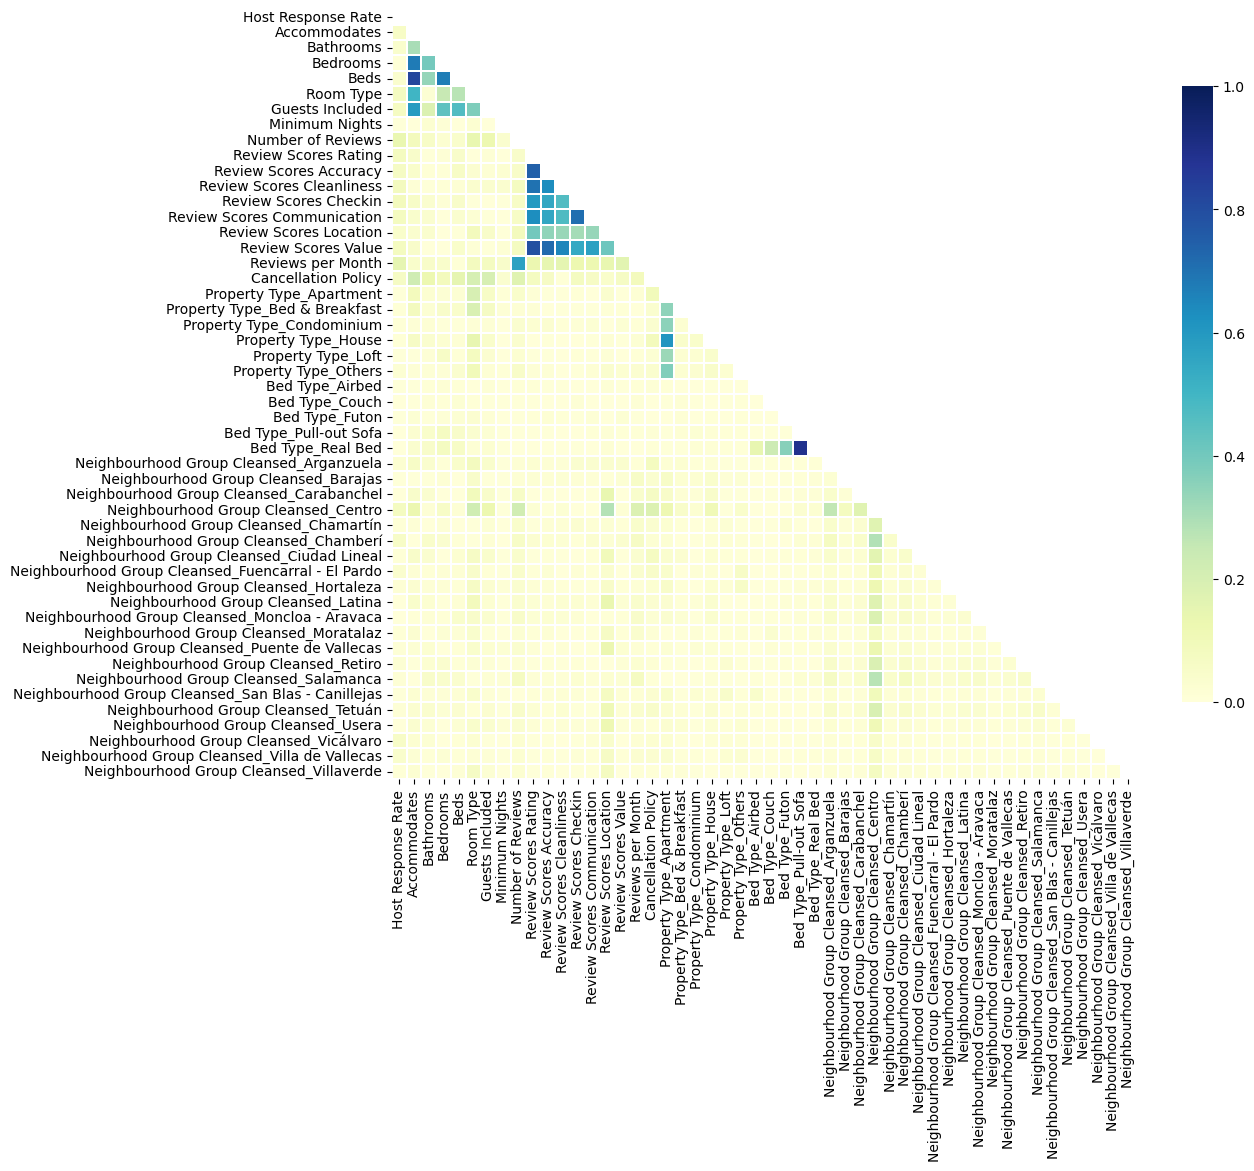

In [82]:
import seaborn as sns

corr = np.abs(df_airbnb.drop(['Price'], axis=1).corr())
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df_airbnb, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

* En primer lugar, como era de esperar, se puede observar cómo existe una fuerte correlación entre 'Beds' y 'Accommodates', y en menor medida entre 'Bedrooms' y 'Accommodates'.
* En segundo lugar, es obvia la correlación entre todas las variables de 'Review Scores', lo cual tampoco sorprende. 
* En tercer lugar, podemos apreciar una fuerte correlación entre las 'Real Bed' y los 'Pull out Sofa'.
* Y en último lugar, aunque la correlación no sea muy elevada, se sobreentiende que 'Number o Reviews' y 'Reviews per Month' sea redundante.

También cabe destacar una correlación entre los 'Property Type', especialmente entre 'House' y 'Apartment', aunque no se considera lo suficientemente fuerte para eliminar alguna variable por el momento.

En base a lo anterior, se toma la decisión de eliminar la variable 'Accommodates', así como todas las 'Review Scores' a excepción de 'Review Score Rating' y 'Review Score Location'. Además, debido a la alta colinealidad, la clase 'Pull-out Sofa' se incluirá en la clase 'Real Bed' para formar una misma variable.

In [ ]:
df_airbnb = df_airbnb.drop(['Accommodates','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Value'], axis=1)
df_airbnb['Bed Type_Real Bed'] = df_airbnb['Bed Type_Real Bed']+df_airbnb['Bed Type_Pull-out Sofa']
df_airbnb = df_airbnb.drop('Bed Type_Pull-out Sofa', axis=1)
df_airbnb = df_airbnb.drop('Reviews per Month', axis=1)

### 3.5. Generación de variables

* Probamos con la transformación logarítmica de 'Minimum Nights', 'Review Scores Rating', 'Review Scores Location' y 'Host Response Rate'.

In [ ]:
df_airbnb['Log Minimum Nights']=np.log1p(df_airbnb['Minimum Nights'])
df_airbnb['Log Reviews Rating']=np.log1p(df_airbnb['Review Scores Rating'])
df_airbnb['Log Reviews Location']=np.log1p(df_airbnb['Review Scores Location'])
df_airbnb['Log Host Response']=np.log1p(df_airbnb['Host Response Rate'])

* Además, generamos nuevas relaciones entre variables para comprobar su comportamiento en el modelo, como la relación entre huéspedes y número de camas, ocamas entre habitaciones y huéspedes entre metros cuadrados.

No obstante, algunos valores de estas columnas son cero, por lo que habrá que hacer una pequeña conversión para no dar lugar a valores infinitos o indefinidos.

In [ ]:
df_airbnb['Bedrooms'] = df_airbnb['Bedrooms'].replace(0, np.finfo(float).eps)

In [ ]:
df_airbnb['Guests/Beds']=df_airbnb['Guests Included']/df_airbnb['Beds']
df_airbnb['Beds/Bedrooms']=df_airbnb['Beds']/df_airbnb['Bedrooms']

* También generamos otras variables como 'Number of Reviews' multiplicado por 'Review Score Location' y 'Number of Reviews' por 'Review Score Rating'.

In [ ]:
df_airbnb['Reviews*Location']=df_airbnb['Number of Reviews']*df_airbnb['Review Scores Location']
df_airbnb['Reviews*Rating']=df_airbnb['Number of Reviews']*df_airbnb['Review Scores Rating']

### 3.6. Selección de variables

Para la selección de variables, se va a utilizar el algoritmo Random Forest.

In [ ]:
X_train = df_airbnb.drop('Price',axis=1)
y_train = df_airbnb['Price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Se definen los parámetros
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

# Se configura GridSearch
grid = GridSearchCV(
    RandomForestRegressor(n_estimators=200, random_state=11),
    param_grid=tuned_parameters,
    cv=5,
    scoring='r2',
    verbose=1)

# Se entrena el modelo
grid.fit(X_train, y_train)

# Se muestran los resultados
print("Best R2 score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

# Gráfica de los resultados
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('R2')
plt.ylabel('R2 10-fold')

plt.show()

In [ ]:
best_depth = grid.best_params_['max_depth']

RandomForest = RandomForestRegressor(max_depth=best_depth,n_estimators=200, random_state=11).fit(X_train,y_train)

print("Train: ",RandomForest.score(X_train,y_train))

* Una vez obtenido el hiperparámetro óptimo, buscamos las variables más relevantes y eliminamos aquellas con poco impacto.

In [ ]:
importances = RandomForest.feature_importances_
importances = importances / np.max(importances)
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Tal y como se esperaba, las variables más influyentes serán el número de habitaciones, baños y el tipo de habitación. Además, también podemos destacar la importancia de las variables generadas 'Guests/Beds', 'ReviewsRating' y 'ReviewsLocation'. Igualmente destacan otras variables como el número mínimo de noches, la respuesta del huésped, las camas, el número de 'Reviews' mensuales, los huéspedes incluidos, la política de cancelación, etc.

Por otro lado, variables procedentes de la codificación del tipo de cama parecen no tener influencia alguna, así como algunos de los barrios parecen ser irrelevantes.

Por lo tanto, primero se van a eliminar las variables generadas irrelevantes y las variables que se consideran duplicadas.

In [ ]:
X_train=X_train.drop(['Log Minimum Nights','Log Host Response','Log Reviews Rating','Log Reviews Location','Number of Reviews','Beds','Review Scores Location','Review Scores Rating'],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Se definen los parámetros
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

# Se configura GridSearch
grid = GridSearchCV(
    RandomForestRegressor(n_estimators=200,random_state=11),
    param_grid=tuned_parameters,
    cv=5,
    scoring='r2',
    verbose=1)

# Se entrena el modelo
grid.fit(X_train, y_train)

# Se muestran los resultados
print("Best R2 score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

# Gráfica de los resultados
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('R2')
plt.ylabel('R2 10-fold')

plt.show()

In [ ]:
best_depth = grid.best_params_['max_depth']
RandomForest = RandomForestRegressor(max_depth=best_depth,n_estimators=200, random_state=11).fit(X_train,y_train)

print("Train: ",RandomForest.score(X_train,y_train))

In [ ]:
importances = RandomForest.feature_importances_
importances = importances / np.max(importances)
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

* Generamos una gráfica en la que se analiza la relación entre el número de características y el R2 Score.

In [ ]:
scores = []

for i in range(1,30):
    important_features_top_n = features[indices[:i]]
    X_train_new = X_train[important_features_top_n]
    RandomForest = RandomForestRegressor(max_depth=best_depth,n_estimators=200, random_state=11).fit(X_train_new,y_train)
    score = RandomForest.score(X_train_new, y_train)
    scores.append(score)
     
plt.figure(figsize=(8, 6))
plt.scatter(range(1, 30), scores)
plt.plot(range(1, 30), scores, linestyle='--', color='b', marker='o')
plt.xlabel('Número de Características')
plt.ylabel('R2 Score')
plt.show()

Decidimos utilizar las 15 mejores variables, ya que a pesar de no tener el rendimiento óptimo, queremos evitar el sobreajuste.

In [ ]:
important_features_15 = features[indices[:15]]
X_train_15 = X_train[important_features_15]

# También generamos una variable con las 10 mejores características para hacer pruebas.
important_features_10 = features[indices[:10]]
X_train_10 = X_train[important_features_10]

* Entrenamos de nuevo el Random Forest usando GridSearch para buscar la profundidad máxima óptima para las 15 características más importantes.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Se definen los parámetros
#maxDepth = range(1,15)
#minSplit = range(2,10)
#minLeaf = range(1,5)
maxDepth = [11]
minSplit = [2,3]
minLeaf = [2]
tuned_parameters = {'max_depth': maxDepth, 'min_samples_split': minSplit,
    'min_samples_leaf': minLeaf}

# Se configura GridSearch
grid = GridSearchCV(
    RandomForestRegressor(n_estimators=200,random_state=11),
    param_grid=tuned_parameters,
    cv=5,
    scoring='r2',
    verbose=1)

# Se entrena el modelo
grid.fit(X_train_15, y_train)

# Se muestran los resultados
print("Best R2 score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

In [ ]:
best_depth = grid.best_params_['max_depth']
RandomForest = RandomForestRegressor(max_depth=best_depth,n_estimators=200, random_state=11).fit(X_train_15,y_train)

print("Train: ",RandomForest.score(X_train_15,y_train))

El resultado obtenido es aceptable, no obstante, el resultado a tener en cuenta será el del Cross Validation y la evaluación con Test.

## 4. Modelado

### 4.1. Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

best_depth = grid.best_params_['max_depth']
best_split = grid.best_params_['min_samples_split']
best_leaf = grid.best_params_['min_samples_leaf']

RandomForest = RandomForestRegressor(max_depth=best_depth, min_samples_split=best_split, min_samples_leaf=best_leaf, n_estimators=200, random_state=11)

# Cross Validation con 5 folds
cv_scores = cross_val_score(RandomForest, X_train_15, y_train, cv=5, scoring='r2')

# Resultados
print(f"R2 por fold: {cv_scores}")
print(f"R2 promedio: {cv_scores.mean():.4f}")

* El resultado obtenido con validación cruzada es más realista, y muestra un posible sobreajuste en el modelo. Por ello, probamos a disminuir las características del modelo, el 'max_depth' y aumentar el 'min_samples_split' y 'min_samples_leaf'.

In [ ]:
RandomForest = RandomForestRegressor(max_depth=9, min_samples_split=3, min_samples_leaf=3, n_estimators=200, random_state=11)

# Cross Validation con 5 folds
cv_scores = cross_val_score(RandomForest, X_train_10, y_train, cv=5, scoring='r2')

# Resultados
print(f"R2 por fold: {cv_scores}")
print(f"R2 promedio: {cv_scores.mean():.4f}")

Dados los resultados, a pesar de un posible sobreajuste, decidimos proceder con el anterior modelo de 15 características, un 'max_depth' de 11, 'min_samples_leaf' de 2 y 'min_samples_split' de 2.

In [ ]:
RandomForest = RandomForestRegressor(max_depth=11, min_samples_split=2, min_samples_leaf=2, n_estimators=200, random_state=11)
RandomForest.fit(X_train_15,y_train)

### 4.2. Otros modelos

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_model = LinearRegression()

# Cross Validation con 5 folds
cv_scores_linear = cross_val_score(linear_model, X_train_15, y_train, cv=5, scoring='r2')

# Resultados
print(f"Linear Regression - R2 por fold: {cv_scores_linear}")
print(f"Linear Regression - R2 promedio: {cv_scores_linear.mean():.4f}")

#### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)

cv_scores_knn = cross_val_score(knn_model, X_train_15, y_train, cv=5, scoring='r2')

print(f"KNN - R2 por fold: {cv_scores_knn}")
print(f"KNN - R2 promedio: {cv_scores_knn.mean():.4f}")

Los resultados obtenidos en estos modelos son mucho menos efectivos que el obtenido con Random Forest, por lo que nos quedamos con este.

### 4.2. Evalución

* En primer lugar, aplicamos todos los cambios en el dataset de Test.

In [ ]:
df_test = pd.read_csv('df_airbnb_test.csv')

In [ ]:
df_airbnb_test = df_test[['Host Response Rate','Host Acceptance Rate','Accommodates','Bathrooms','Bedrooms','Beds','Price','Neighbourhood Group Cleansed','City','State','Country','Property Type','Room Type','Bed Type','Guests Included','Minimum Nights','Number of Reviews','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Reviews per Month','Cancellation Policy']]
df_airbnb_test=df_airbnb_test.dropna(subset=['Price'])
df_airbnb_test['Host Response Rate'].fillna(df_airbnb_test['Host Response Rate'].mean(), inplace=True)
df_airbnb_test['Bathrooms'].fillna(df_airbnb_test['Bathrooms'].mode()[0], inplace=True)
df_airbnb_test['Bedrooms'].fillna(df_airbnb_test['Bedrooms'].mode()[0], inplace=True)
df_airbnb_test['Beds'].fillna(df_airbnb_test['Beds'].mode()[0], inplace=True)
df_airbnb_test['Neighbourhood Group Cleansed'].fillna(df_airbnb_test['Neighbourhood Group Cleansed'].mode()[0], inplace=True)
df_airbnb_test['City'].fillna(df_airbnb_test['City'].mode()[0], inplace=True)
df_airbnb_test['State'].fillna(df_airbnb_test['State'].mode()[0], inplace=True)
df_airbnb_test['Country'].fillna(df_airbnb_test['Country'].mode()[0], inplace=True)
df_airbnb_test['Review Scores Rating'].fillna(df_airbnb_test['Review Scores Rating'].mean(), inplace=True)
df_airbnb_test['Review Scores Accuracy'].fillna(df_airbnb_test['Review Scores Accuracy'].mean(), inplace=True)
df_airbnb_test['Review Scores Cleanliness'].fillna(df_airbnb_test['Review Scores Cleanliness'].mean(), inplace=True)
df_airbnb_test['Review Scores Checkin'].fillna(df_airbnb_test['Review Scores Checkin'].mean(), inplace=True)
df_airbnb_test['Review Scores Communication'].fillna(df_airbnb_test['Review Scores Communication'].mean(), inplace=True)
df_airbnb_test['Review Scores Location'].fillna(df_airbnb_test['Review Scores Location'].mean(), inplace=True)
df_airbnb_test['Review Scores Value'].fillna(df_airbnb_test['Review Scores Value'].mean(), inplace=True)
df_airbnb_test['Reviews per Month'].fillna(df_airbnb_test['Reviews per Month'].mean(), inplace=True)
df_airbnb_test=df_airbnb_test[df_airbnb_test['Price']<700]
df_airbnb_test=df_airbnb_test[df_airbnb_test['Guests Included']<=12]
df_airbnb_test=df_airbnb_test[df_airbnb_test['Beds']<=13]
df_airbnb_test=df_airbnb_test[df_airbnb_test['Bedrooms']<=8]
df_airbnb_test=df_airbnb_test[df_airbnb_test['Bathrooms']<=6]
Madrid_centro = ['Madrid','Madrid, Comunidad de Madrid, ES','madrid','MADRID','Chueca','Chueca, Madrid','Ventas','Centro','Madri','Delicias','Madrid, Comunidad de Madrid, ESPANA','Delicias-Madrid']
df_airbnb_test = df_airbnb_test[df_airbnb_test['City'].isin(Madrid_centro)]
df_airbnb_test = df_airbnb_test.drop(['City','State','Country'], axis=1)
le_room = LabelEncoder()
df_airbnb_test.loc[:,'Room Type'] = le_room.fit_transform(df_airbnb_test['Room Type'])
le_cancel = LabelEncoder()
df_airbnb_test.loc[:,'Cancellation Policy'] = le_cancel.fit_transform(df_airbnb_test['Cancellation Policy'])
for i,x in df_airbnb_test['Property Type'].items():
    if x != 'Apartment' and x != 'House' and x!= 'Condominium' and x!= 'Bed & Breakfast' and x!= 'Loft':
        df_airbnb_test.loc[i,'Property Type']='Others'
df_airbnb_test = pd.get_dummies(df_airbnb_test, columns=['Property Type', 'Bed Type'], dtype=int)
df_airbnb_test = pd.get_dummies(df_airbnb_test, columns=['Neighbourhood Group Cleansed'], dtype=int)
df_airbnb_test_test = df_airbnb_test.drop(['Accommodates','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Value'], axis=1)
df_airbnb_test['Bed Type_Real Bed'] = df_airbnb_test['Bed Type_Real Bed']+df_airbnb_test['Bed Type_Pull-out Sofa']
df_airbnb_test = df_airbnb_test.drop('Bed Type_Pull-out Sofa', axis=1)
df_airbnb_test = df_airbnb_test.drop('Reviews per Month', axis=1)
df_airbnb_test['Bedrooms'] = df_airbnb_test['Bedrooms'].replace(0, np.finfo(float).eps)
df_airbnb_test['Guests/Beds']=df_airbnb_test['Guests Included']/df_airbnb_test['Beds']
df_airbnb_test['Beds/Bedrooms']=df_airbnb_test['Beds']/df_airbnb_test['Bedrooms']
df_airbnb_test['Reviews*Location']=df_airbnb_test['Number of Reviews']*df_airbnb_test['Review Scores Location']
df_airbnb_test['Reviews*Rating']=df_airbnb_test['Number of Reviews']*df_airbnb_test['Review Scores Rating']

X_test = df_airbnb_test[['Bedrooms', 'Bathrooms', 'Room Type', 'Minimum Nights','Host Response Rate', 'Reviews*Rating', 'Guests/Beds','Reviews*Location', 'Cancellation Policy','Beds/Bedrooms','Guests Included', 'Neighbourhood Group Cleansed_Centro','Neighbourhood Group Cleansed_Salamanca','Property Type_Bed & Breakfast','Neighbourhood Group Cleansed_Moncloa - Aravaca']]
y_test = df_airbnb_test['Price']

* Y por último, procedemos a la evaluación del modelo de Random Forest con los datos de test.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_hat = RandomForest.predict(X_test)

r2 = r2_score(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

print(f"R² en el conjunto de prueba: {r2:.4f}")
print(f"RMSE en el conjunto de prueba: {rmse:.4f}")

### 4.3. Conclusión

Como era de esperar, el resultado obtenido con los datos de Test no es el deseado. Esto se puede deber a diferentes factores:
* **Ausencia de una variable relevante como son los metros cuadrados:** esta característica tenía más de un 90% de nulos, por lo que tuvo que ser desechada, pero deduzco que podría haber sido muy influyente en el modelo.
* **Gran cantidad de nulos:** la necesidad de eliminar instancias y de imputar muchos valores puede dar lugar a un sesgo en los datos.
* **Muchos outliers:** la presencia de gran cantidad de ouliers en casi todos los valores puede generar un modelo poco generalizado, dando lugar a malas predicciones.
* **Enorme variedad de precios**: en la fase de análisis exploratorio se pudo observar cómo en la mayoría de variables hay una cantidad enorme de precios para un mismo valor.
* **Sobreajuste:** tal y como se explicó con anterioridad, el sobreajuste de los datos genera malos resultados con nuevos datos de entrada.

En definitiva, con más datos de entrada, generando nuevas variables y generalizando más el modelo, se podría obtener mejores resultados. No obstante, considero que con las herramientas de las que disponemos es complicado obtener resultados mucho mejores.